In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from thermo_models.RaoultsLawModel import *
from distillation.DistillationModel import DistillationModel
from utils.AntoineEquation import * 
from IPython.display import clear_output
from tqdm import tqdm
from distillation.DistillationTernary import *
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive, Button, VBox, HBox, Output
from IPython.display import clear_output
from thermo_models.MargulesModel import *
from thermo_models.WilsonModel import *


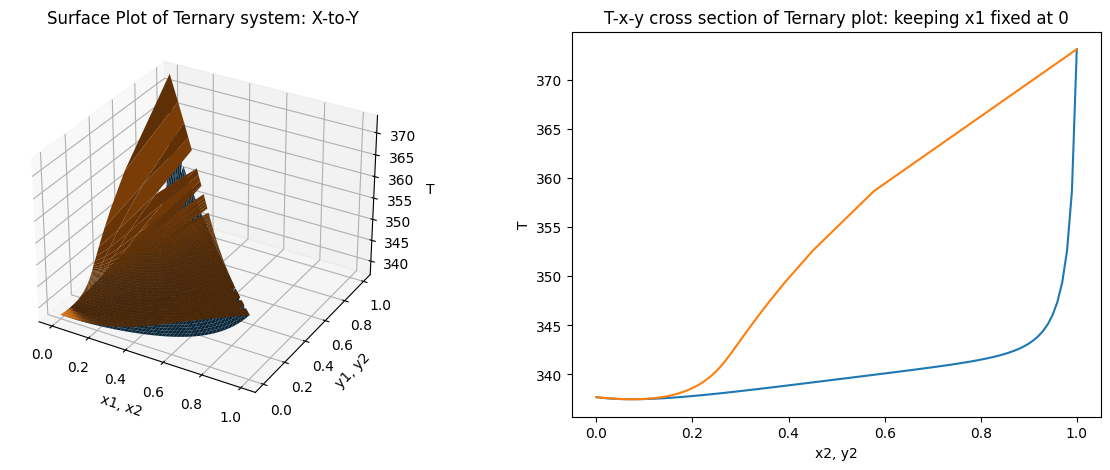

In [2]:
A_ = np.array([[0, -316.699, 350.100], [-384.657,0, 307.000],[290.200,143.00,0]])
P_sys = 1

#Acetaldehyde
Acet_A = 3.68639
Acet_B = 822.894
Acet_C = -69.899
#Methanol
Me_A = 5.31301
Me_B = 1676.569
Me_C = -21.728
#Water
H2O_A = 3.55959
H2O_B = 643.748
H2O_C = -198.043

#Antoine Equations 
Acet_antoine = AE.AntoineEquationBase10(Acet_A, Acet_B, Acet_C)
H2O_antoine = AE.AntoineEquationBase10(H2O_A, H2O_B, H2O_C)
Methanol_antoine = AE.AntoineEquationBase10(Me_A, Me_B, Me_C)

vle_model = MargulesModelTernary(3,P_sys,A_,[Acet_antoine, Methanol_antoine, H2O_antoine])


In [3]:
R1_slider =  widgets.FloatSlider(value=0.1, min=0, max=2, step=0.001,  description='Reflux Ratio:', readout_format='.1f')
go_button = widgets.Button(description='Create Model', width='15%', margin='0 10px 0 0')
out_oplines = Output()

def plot_rect_strip_ex2(R = R1_slider):
    plt.close('all')  # Ensure that any existing figures are closed before plotting a new one.
    xF = np.array([0.3, 0.3, 0.4])
    xD = np.array([0.5030, 0.4960, 0.0010])
    xB = np.array([1e-10, 0.0103,0.9897])
    distillation_model = DistillationModelTernary(vle_model, xF = xF, xD = xD, xB = xB, reflux = R)
    fig, ax = plt.subplots(1,1,figsize= (5,5))
    distillation_model.plot_rect_strip(ax)
    plt.subplots_adjust(hspace=0)
    plt.show()

In [12]:
def on_go_button_click(b):
    with out_oplines:
        clear_output(wait=True)
        plt.close('all')  # Close all open matplotlib plots
        plot_rect_strip_ex2( R=R1_slider.value)
        
go_button = Button(description='Generate Plot')
go_button.on_click(on_go_button_click)

layout = VBox([HBox([R1_slider, go_button]), out_oplines])
display(layout)